# Homework 1
This is the template for the first homework assignment.
The only function that you are required to fill in and turn in to Gradescope is "compute_features".
Please do not edit definition of "compute_features" so the Gradescope unit tests run successfully.

In [1]:
# Uncomment and run this code if you want to verify your `sklearn` installation.
# If this cell outputs 'array([1])', then it's installed correctly.

from sklearn import tree
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
clf.predict([[2, 2]])

array([1])

In [103]:
import numpy as np


# When you turn this function in to Gradescope, it is easiest to copy and paste this cell to a new python file called hw1.py
# and upload that file instead of the full Jupyter Notebook code (which will cause problems for Gradescope)
def compute_features(names):
    """
    Given a list of names of length N, return a numpy matrix of shape (N, 260)
    with the features described in problem 2b of the homework assignment.
    
    Parameters
    ----------
    names: A list of strings
        The names to featurize, e.g. ["albert einstein", "marie curie"]
    
    Returns
    -------
    numpy.array:
        A numpy array of shape (N, 260)
    """
    Alphabet = ['a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i', 'j','k', 'l', 'm', 'n', 'o',
               'p', 'q', 'r', 's', 't','u', 'v', 'w', 'x', 'y' , 'z']
 
    N = len(names)
    Feature_matrix = np.zeros((N, 260))
    for row in range(0, N):
        firstLast = names[row].split()
        first = firstLast[0]  #First Name
        last = firstLast[1]   #Last Name
        if(len(first) < 5):
            firstRange = len(first)
        else:
            firstRange = 5
        if(len(last) < 5):
            lastRange = len(last)
        else:
            lastRange = 5
        for index in range(0,firstRange):  #iterate though first 5 letters of First name
            offset = 26 * index
            featureIndex = offset + Alphabet.index(first[index])
            Feature_matrix[row,featureIndex] = 1
        index = 4         #advance index in case length was less than 5 
        for Lastindex in range(0,lastRange):  #iterate though first 5 letters of Last name
            index += 1
            offset = 26 * index
            featureIndex = offset + Alphabet.index(last[Lastindex])
            Feature_matrix[row,featureIndex] = 1
    return Feature_matrix


In [117]:
train = [line.rstrip('\n') for line in open('badges/train.names.txt')]
test = [line.rstrip('\n') for line in open('badges/test.names.txt')]

x_train1 = compute_features(train)
y_train1 = np.load('badges/train.labels.npy')
x_test1 = compute_features(test)
y_test1 = np.load('badges/test.labels.npy')

#SGD
sgd_acc_train1, sgd_acc_featuretest = train_and_evaluate_sgd(x_train1, y_train1, x_test1, y_test1)

#DT
dt_acc_train1, dt_acc_featuretest = train_and_evaluate_decision_tree(x_train1, y_train1, x_test1, y_test1)

#Stumps
dt4_acc_train1, dt4_acc_featuretest = train_and_evaluate_decision_stump(x_train1, y_train1, x_test1, y_test1)

#SGD_Stumps
stumps_acc_train1, stumps_acc_featuretest = train_and_evaluate_sgd_with_stumps(x_train1, y_train1, x_test1, y_test1)

print(sgd_acc_train1, sgd_acc_featuretest)
print(dt_acc_train1,dt_acc_featuretest)
print(dt4_acc_train1,dt4_acc_featuretest)
print(stumps_acc_train1,stumps_acc_featuretest)

0.74 0.591
1.0 0.587
0.677 0.66
0.74 0.661


You are not required to use the functions defined below, but they may be useful for you to think about how to structure your code.

In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

"""
    Trains a SGDClassifier on the training data and computes two accuracy scores, the
    accuracy of the classifier on the training data and the accuracy of the decision
    tree on the testing data.
        
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training and testing accuracies represented as a tuple of size 2.
    """
def train_and_evaluate_sgd(X_train, y_train, X_test, y_test):
    model = SGDClassifier(loss='log', max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_heldPred = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred)
    acc_heldOut = accuracy_score(y_test, y_heldPred)
    
    
    return acc_train, acc_heldOut

In [31]:
import numpy as np, math
#SGD
#iteration1
x_train1 = np.load('madelon/cv-train-X.0.npy')
y_train1 = np.load('madelon/cv-train-y.0.npy')
x_test1 = np.load('madelon/cv-heldout-X.0.npy')
y_test1 = np.load('madelon/cv-heldout-y.0.npy')
acc_train1, acc_heldOut1 = train_and_evaluate_sgd(x_train1, y_train1, x_test1, y_test1)

#iteration2
x_train2 = np.load('madelon/cv-train-X.1.npy')
y_train2 = np.load('madelon/cv-train-y.1.npy')
x_test2 = np.load('madelon/cv-heldout-X.1.npy')
y_test2 = np.load('madelon/cv-heldout-y.1.npy')
acc_train2, acc_heldOut2 = train_and_evaluate_sgd(x_train2, y_train2, x_test2, y_test2)

#iteration3
x_train3 = np.load('madelon/cv-train-X.2.npy')
y_train3 = np.load('madelon/cv-train-y.2.npy')
x_test3 = np.load('madelon/cv-heldout-X.2.npy')
y_test3 = np.load('madelon/cv-heldout-y.2.npy')
acc_train3, acc_heldOut3 = train_and_evaluate_sgd(x_train3, y_train3, x_test3, y_test3)

#iteration4
x_train4 = np.load('madelon/cv-train-X.3.npy')
y_train4 = np.load('madelon/cv-train-y.3.npy')
x_test4 = np.load('madelon/cv-heldout-X.3.npy')
y_test4 = np.load('madelon/cv-heldout-y.3.npy')
acc_train4, acc_heldOut4 = train_and_evaluate_sgd(x_train4, y_train4, x_test4, y_test4)

#iteration5
x_train5 = np.load('madelon/cv-train-X.4.npy')
y_train5 = np.load('madelon/cv-train-y.4.npy')
x_test5 = np.load('madelon/cv-heldout-X.4.npy')
y_test5 = np.load('madelon/cv-heldout-y.4.npy')
acc_train5, acc_heldOut5 = train_and_evaluate_sgd(x_train5, y_train5, x_test5, y_test5)

#Test
X_train = np.load('madelon/train-X.npy')
y_train = np.load('madelon/train-y.npy')
X_test = np.load('madelon/test-X.npy')
y_test = np.load('madelon/test-y.npy')
acc_train, sgd_test_acc = train_and_evaluate_sgd(X_train, y_train, X_test, y_test)

sgd_train_acc = (acc_train1 + acc_train2 + acc_train3 + acc_train4 + acc_train5)/5
sgd_heldout_acc = (acc_heldOut1 + acc_heldOut2 + acc_heldOut3 + acc_heldOut4 + acc_heldOut5)/5

sgd_train_std = np.std([acc_train1, acc_train2, acc_train3, acc_train4, acc_train5])
sgd_heldout_std = np.std([acc_heldOut1, acc_heldOut2, acc_heldOut3, acc_heldOut4, acc_heldOut5])

sgd_confidence_train =  (2.776 * sgd_train_std/math.sqrt(5))
sgd_confidence_heldout =  (2.776 * sgd_heldout_std/math.sqrt(5))

print(sgd_confidence_train)
print(sgd_confidence_heldout)

0.036363878203514007
0.016115152223916476


In [3]:
from sklearn.tree import DecisionTreeClassifier


def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test):
    """
    Trains an unbounded decision tree on the training data and computes two accuracy scores, the
    accuracy of the decision tree on the training data and the accuracy of the decision
    tree on the testing data.
    
    The decision tree should use the information gain criterion (set criterion='entropy')
    
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training and testing accuracies represented as a tuple of size 2.
    """
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_heldPred = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred)
    acc_heldOut = accuracy_score(y_test, y_heldPred)
    return acc_train, acc_heldOut


def train_and_evaluate_decision_stump(X_train, y_train, X_test, y_test):
    """
    Trains a decision stump of maximum depth 4 on the training data and computes two accuracy scores, the
    accuracy of the decision stump on the training data and the accuracy of the decision
    tree on the testing data.
    
    The decision tree should use the information gain criterion (set criterion='entropy')
    
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training and testing accuracies represented as a tuple of size 2.
    """
    model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_heldPred = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred)
    acc_heldOut = accuracy_score(y_test, y_heldPred)
    return acc_train, acc_heldOut

In [32]:
import numpy as np, math
#DT
#iteration1
x_train1 = np.load('madelon/cv-train-X.0.npy')
y_train1 = np.load('madelon/cv-train-y.0.npy')
x_test1 = np.load('madelon/cv-heldout-X.0.npy')
y_test1 = np.load('madelon/cv-heldout-y.0.npy')
acc_train1, acc_heldOut1 = train_and_evaluate_decision_tree(x_train1, y_train1, x_test1, y_test1)

#iteration2
x_train2 = np.load('madelon/cv-train-X.1.npy')
y_train2 = np.load('madelon/cv-train-y.1.npy')
x_test2 = np.load('madelon/cv-heldout-X.1.npy')
y_test2 = np.load('madelon/cv-heldout-y.1.npy')
acc_train2, acc_heldOut2 = train_and_evaluate_decision_tree(x_train2, y_train2, x_test2, y_test2)

#iteration3
x_train3 = np.load('madelon/cv-train-X.2.npy')
y_train3 = np.load('madelon/cv-train-y.2.npy')
x_test3 = np.load('madelon/cv-heldout-X.2.npy')
y_test3 = np.load('madelon/cv-heldout-y.2.npy')
acc_train3, acc_heldOut3 = train_and_evaluate_decision_tree(x_train3, y_train3, x_test3, y_test3)

#iteration4
x_train4 = np.load('madelon/cv-train-X.3.npy')
y_train4 = np.load('madelon/cv-train-y.3.npy')
x_test4 = np.load('madelon/cv-heldout-X.3.npy')
y_test4 = np.load('madelon/cv-heldout-y.3.npy')
acc_train4, acc_heldOut4 = train_and_evaluate_decision_tree(x_train4, y_train4, x_test4, y_test4)

#iteration5
x_train5 = np.load('madelon/cv-train-X.4.npy')
y_train5 = np.load('madelon/cv-train-y.4.npy')
x_test5 = np.load('madelon/cv-heldout-X.4.npy')
y_test5 = np.load('madelon/cv-heldout-y.4.npy')
acc_train5, acc_heldOut5 = train_and_evaluate_decision_tree(x_train5, y_train5, x_test5, y_test5)

#Test
X_train = np.load('madelon/train-X.npy')
y_train = np.load('madelon/train-y.npy')
X_test = np.load('madelon/test-X.npy')
y_test = np.load('madelon/test-y.npy')
acc_train, dt_test_acc = train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test)

dt_train_acc = (acc_train1 + acc_train2 + acc_train3 + acc_train4 + acc_train5)/5
dt_heldout_acc = (acc_heldOut1 + acc_heldOut2 + acc_heldOut3 + acc_heldOut4 + acc_heldOut5)/5

dt_train_std = np.std([acc_train1, acc_train2, acc_train3, acc_train4, acc_train5])
dt_heldout_std = np.std([acc_heldOut1, acc_heldOut2, acc_heldOut3, acc_heldOut4, acc_heldOut5])

dt_confidence_train = (2.776 * dt_train_std/math.sqrt(5))
dt_confidence_heldout = (2.776 * dt_heldout_std/math.sqrt(5))
print(dt_confidence_train)
print(dt_confidence_heldout)

0.0
0.030116721521440525


In [34]:
#decision stump
#iteration1
x_train1 = np.load('madelon/cv-train-X.0.npy')
y_train1 = np.load('madelon/cv-train-y.0.npy')
x_test1 = np.load('madelon/cv-heldout-X.0.npy')
y_test1 = np.load('madelon/cv-heldout-y.0.npy')
acc_train1, acc_heldOut1 = train_and_evaluate_decision_stump(x_train1, y_train1, x_test1, y_test1)

#iteration2
x_train2 = np.load('madelon/cv-train-X.1.npy')
y_train2 = np.load('madelon/cv-train-y.1.npy')
x_test2 = np.load('madelon/cv-heldout-X.1.npy')
y_test2 = np.load('madelon/cv-heldout-y.1.npy')
acc_train2, acc_heldOut2 = train_and_evaluate_decision_stump(x_train2, y_train2, x_test2, y_test2)

#iteration3
x_train3 = np.load('madelon/cv-train-X.2.npy')
y_train3 = np.load('madelon/cv-train-y.2.npy')
x_test3 = np.load('madelon/cv-heldout-X.2.npy')
y_test3 = np.load('madelon/cv-heldout-y.2.npy')
acc_train3, acc_heldOut3 = train_and_evaluate_decision_stump(x_train3, y_train3, x_test3, y_test3)

#iteration4
x_train4 = np.load('madelon/cv-train-X.3.npy')
y_train4 = np.load('madelon/cv-train-y.3.npy')
x_test4 = np.load('madelon/cv-heldout-X.3.npy')
y_test4 = np.load('madelon/cv-heldout-y.3.npy')
acc_train4, acc_heldOut4 = train_and_evaluate_decision_stump(x_train4, y_train4, x_test4, y_test4)

#iteration5
x_train5 = np.load('madelon/cv-train-X.4.npy')
y_train5 = np.load('madelon/cv-train-y.4.npy')
x_test5 = np.load('madelon/cv-heldout-X.4.npy')
y_test5 = np.load('madelon/cv-heldout-y.4.npy')
acc_train5, acc_heldOut5 = train_and_evaluate_decision_stump(x_train5, y_train5, x_test5, y_test5)

#Test
X_train = np.load('madelon/train-X.npy')
y_train = np.load('madelon/train-y.npy')
X_test = np.load('madelon/test-X.npy')
y_test = np.load('madelon/test-y.npy')
acc_train, dt4_test_acc = train_and_evaluate_decision_stump(X_train, y_train, X_test, y_test)

dt4_train_acc = (acc_train1 + acc_train2 + acc_train3 + acc_train4 + acc_train5)/5
dt4_heldout_acc = (acc_heldOut1 + acc_heldOut2 + acc_heldOut3 + acc_heldOut4 + acc_heldOut5)/5

dt4_train_std = np.std([acc_train1, acc_train2, acc_train3, acc_train4, acc_train5])
dt4_heldout_std = np.std([acc_heldOut1, acc_heldOut2, acc_heldOut3, acc_heldOut4, acc_heldOut5])

dt4_confidence_train =  (2.776 * dt4_train_std/math.sqrt(5))
dt4_confidence_heldout =  (2.776 * dt4_heldout_std/math.sqrt(5))

print(dt4_confidence_train)
print(dt4_confidence_heldout)

0.014516051460366206
0.020995077213480328


In [6]:
import math
from random import sample
def train_and_evaluate_sgd_with_stumps(X_train, y_train, X_test, y_test):
    
    Ntrain = len(X_train) 
    k = len(X_train[0])  #50
    Neval = len(X_test)
    
    X_prime_train = np.zeros((Ntrain, 50))
    X_prime_eval = np.zeros((Neval, 50))
    for j in range(0, 50):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
        indices = range(0, k)
        sample = random.sample(indices, math.ceil(k/2))
        X_random = X_train[:,sample]
        model.fit(X_random, y_train)  #train with random features
        X_eval_random = X_test[:,sample]
        ptrain = model.predict(X_random)
        peval = model.predict(X_eval_random)
        X_prime_train[:,j] = ptrain.T
        X_prime_eval[:,j] = peval.T
    
    #Train SDG classifier
    sgd_model = SGDClassifier(loss='log', max_iter=10000)
    sgd_model.fit(X_prime_train, y_train)
    y_pred = sgd_model.predict(X_prime_train)
    y_heldPred = sgd_model.predict(X_prime_eval)
    acc_train = accuracy_score(y_train, y_pred)
    acc_heldOut = accuracy_score(y_test, y_heldPred)
    return acc_train, acc_heldOut

In [37]:
import numpy as np
import random
from random import sample

#sgd with stumps
#iteration1
x_train1 = np.load('madelon/cv-train-X.0.npy')
y_train1 = np.load('madelon/cv-train-y.0.npy')
x_test1 = np.load('madelon/cv-heldout-X.0.npy')
y_test1 = np.load('madelon/cv-heldout-y.0.npy')
acc_train1, acc_heldOut1 = train_and_evaluate_sgd_with_stumps(x_train1, y_train1, x_test1, y_test1)

#iteration2
x_train2 = np.load('madelon/cv-train-X.1.npy')
y_train2 = np.load('madelon/cv-train-y.1.npy')
x_test2 = np.load('madelon/cv-heldout-X.1.npy')
y_test2 = np.load('madelon/cv-heldout-y.1.npy')
acc_train2, acc_heldOut2 = train_and_evaluate_sgd_with_stumps(x_train2, y_train2, x_test2, y_test2)

#iteration3
x_train3 = np.load('madelon/cv-train-X.2.npy')
y_train3 = np.load('madelon/cv-train-y.2.npy')
x_test3 = np.load('madelon/cv-heldout-X.2.npy')
y_test3 = np.load('madelon/cv-heldout-y.2.npy')
acc_train3, acc_heldOut3 = train_and_evaluate_sgd_with_stumps(x_train3, y_train3, x_test3, y_test3)

#iteration4
x_train4 = np.load('madelon/cv-train-X.3.npy')
y_train4 = np.load('madelon/cv-train-y.3.npy')
x_test4 = np.load('madelon/cv-heldout-X.3.npy')
y_test4 = np.load('madelon/cv-heldout-y.3.npy')
acc_train4, acc_heldOut4 = train_and_evaluate_sgd_with_stumps(x_train4, y_train4, x_test4, y_test4)

#iteration5
x_train5 = np.load('madelon/cv-train-X.4.npy')
y_train5 = np.load('madelon/cv-train-y.4.npy')
x_test5 = np.load('madelon/cv-heldout-X.4.npy')
y_test5 = np.load('madelon/cv-heldout-y.4.npy')
acc_train5, acc_heldOut5 = train_and_evaluate_sgd_with_stumps(x_train5, y_train5, x_test5, y_test5)

#Test
X_train = np.load('madelon/train-X.npy')
y_train = np.load('madelon/train-y.npy')
X_test = np.load('madelon/test-X.npy')
y_test = np.load('madelon/test-y.npy')
acc_train, stumps_test_acc = train_and_evaluate_sgd_with_stumps(X_train, y_train, X_test, y_test)

stumps_train_acc = (acc_train1 + acc_train2 + acc_train3 + acc_train4 + acc_train5)/5
stumps_heldout_acc = (acc_heldOut1 + acc_heldOut2 + acc_heldOut3 + acc_heldOut4 + acc_heldOut5)/5

stumps_train_std = np.std([acc_train1, acc_train2, acc_train3, acc_train4, acc_train5])
stumps_heldout_std = np.std([acc_heldOut1, acc_heldOut2, acc_heldOut3, acc_heldOut4, acc_heldOut5])

stumps_confidence_train =  (2.776 * stumps_train_std/math.sqrt(5))
stumps_confidence_heldout =  (2.776 * stumps_heldout_std/math.sqrt(5))

print(stumps_confidence_train)
print(stumps_confidence_heldout)

0.01874699413772778
0.03474993207475376


In [8]:
def load_cv_split(fold):
    """
    Parameters
    ----------
    fold: int
        The integer index of the split to load, i.e. 0, 1, 2, 3, or 4
        
    Returns
    -------
    A tuple of 4 numpy arrays that correspond to the following items:
        X_train, y_train, X_test, y_test
    """
    return None, None, None, None

In [15]:
import os
import matplotlib.pyplot as plt


def plot_results(sgd_train_acc, sgd_train_std, sgd_heldout_acc, sgd_heldout_std, sgd_test_acc,
                 dt_train_acc, dt_train_std, dt_heldout_acc, dt_heldout_std, dt_test_acc,
                 dt4_train_acc, dt4_train_std, dt4_heldout_acc, dt4_heldout_std, dt4_test_acc,
                 stumps_train_acc, stumps_train_std, stumps_heldout_acc, stumps_heldout_std, stumps_test_acc):
    """
    Plots the final results from problem 2. For each of the 4 classifiers, pass
    the training accuracy, training standard deviation, held-out accuracy, held-out
    standard deviation, and testing accuracy.

    Although it should not be necessary, feel free to edit this method.
    """
    train_x_pos = [0, 4, 8, 12]
    cv_x_pos = [1, 5, 9, 13]
    test_x_pos = [2, 6, 10, 14]
    ticks = cv_x_pos

    labels = ['sgd', 'dt', 'dt4', 'stumps (4 x 50)']

    train_accs = [sgd_train_acc, dt_train_acc, dt4_train_acc, stumps_train_acc]
    train_errors = [sgd_train_std, dt_train_std, dt4_train_std, stumps_train_std]

    cv_accs = [sgd_heldout_acc, dt_heldout_acc, dt4_heldout_acc, stumps_heldout_acc]
    cv_errors = [sgd_heldout_std, dt_heldout_std, dt4_heldout_std, stumps_heldout_std]

    test_accs = [sgd_test_acc, dt_test_acc, dt4_test_acc, stumps_test_acc]

    fig, ax = plt.subplots()
    ax.bar(train_x_pos, train_accs, yerr=train_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='train')
    ax.bar(cv_x_pos, cv_accs, yerr=cv_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='held-out')
    ax.bar(test_x_pos, test_accs, align='center', alpha=0.5, capsize=10, label='test')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_title('Models')
    ax.yaxis.grid(True)
    ax.legend()
    plt.tight_layout()

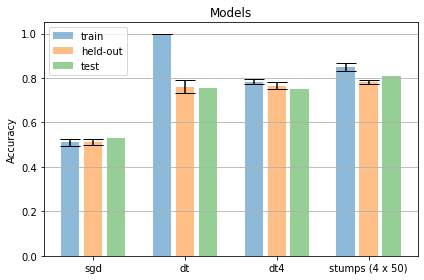

In [16]:
plot_results(sgd_train_acc, sgd_train_std, sgd_heldout_acc, sgd_heldout_std, sgd_test_acc,
             dt_train_acc, dt_train_std, dt_heldout_acc, dt_heldout_std, dt_test_acc,
             dt4_train_acc, dt4_train_std, dt4_heldout_acc, dt4_heldout_std, dt4_test_acc,
             stumps_train_acc, stumps_train_std, stumps_heldout_acc, stumps_heldout_std, stumps_test_acc)